In [1]:
#モジュールの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#データの読み込み
newly = pd.read_csv("newly_confirmed_cases_daily.csv",parse_dates=True) #新規陽性者数の推移
humanflow = pd.read_csv("humanFlow_zenkoku.csv",parse_dates=True) #全国の主要地区・歓楽街の人出
test = pd.read_csv("130001_tokyo_covid19_positivity_rate_in_testing.csv",parse_dates=True) #東京都のcovid19検査数

In [3]:
#新規陽性者数を確認
newly.head()

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/1/16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/1/17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/1/18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/1/19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/1/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
newly["変化量"] = newly["Tokyo"].pct_change() 

In [5]:
#見にくいので年で区切る　
print(newly["Date"].dtypes)
newly["Date"] = pd.to_datetime(newly["Date"])
print(newly["Date"].dtype) #データ型の確認

object
datetime64[ns]


In [6]:
#年、月、日、月日のカラムを作成
newly["year"] = newly["Date"].dt.year
newly["month"] = newly["Date"].dt.month
newly["day"] = newly["Date"].dt.day


newly_2022 = newly[newly["year"] == 2022] #2022年のみ抽出
newly_2021 = newly[newly["year"] == 2021] #2021年のみ抽出
newly_2020 = newly[newly["year"] == 2020] #2020年のみ抽出

newly_2022

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa,変化量,year,month,day
716,2022-01-01,466,24,0,1,1,0,0,2,2,...,1,0,0,0,0,46,0.116883,2022,1,1
717,2022-01-02,432,6,0,0,1,0,0,6,2,...,1,0,0,0,1,53,-0.244186,2022,1,2
718,2022-01-03,788,15,2,3,3,0,1,1,5,...,1,1,1,1,4,128,1.000000,2022,1,3
719,2022-01-04,1094,30,2,1,5,0,1,3,9,...,8,0,1,0,1,216,0.161538,2022,1,4
720,2022-01-05,2788,60,7,3,2,0,13,12,14,...,16,3,2,3,19,629,1.847682,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022-08-14,178329,6006,1509,1107,2418,817,1073,1965,3178,...,2981,2966,1970,3011,3486,3679,-0.043453,2022,8,14
942,2022-08-15,138577,5290,815,789,1514,732,999,1257,2557,...,1941,1814,1543,1530,2626,2082,0.017370,2022,8,15
943,2022-08-16,166174,5540,1232,969,2947,1181,1087,1571,1737,...,1980,2769,1914,2085,3495,4315,0.016252,2022,8,16
944,2022-08-17,231472,6880,1947,1266,3624,1673,1643,1977,2620,...,3342,5157,3027,3213,4624,4837,0.251159,2022,8,17


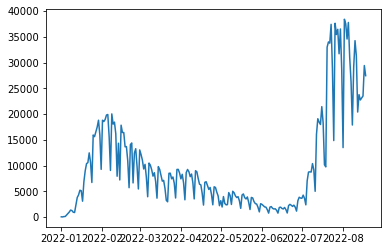

In [7]:
#再度描画
plt.plot(newly_2022["Date"],newly_2022["Tokyo"]);

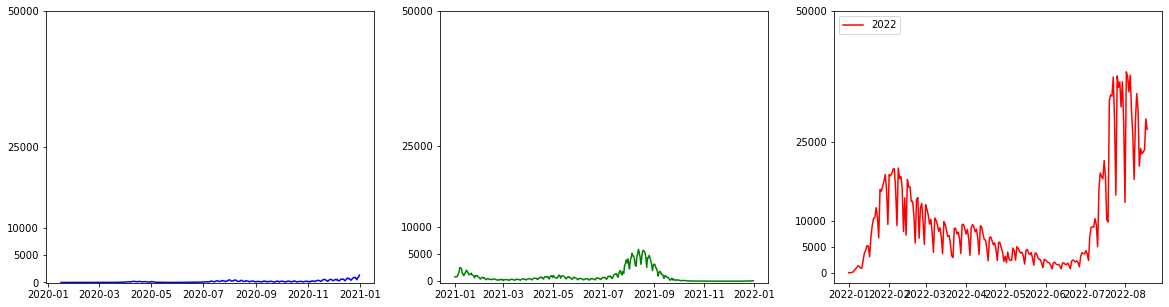

In [8]:
#時系列を重ねて表示
plt.figure(figsize=(20,5))

c1,c2,c3 = "blue","green","red"  
l1,l2,l3 = "2020","2021","2022" 

y = [0, 5000, 10000, 25000, 50000]

plt.subplot(131)
plt.plot(newly_2020["Date"], newly_2020["Tokyo"], color=c1, label=l1)
plt.yticks(y) #y軸のメモリを変更

plt.subplot(132)
plt.plot(newly_2021["Date"], newly_2021["Tokyo"], color=c2, label=l2)
plt.yticks(y) #y軸のメモリを変更

plt.subplot(133)
plt.plot(newly_2022["Date"], newly_2022["Tokyo"], color=c3, label=l3)
plt.yticks(y) #y軸のメモリを変更

plt.legend(loc=2)

plt.show()

今年に入って爆発的に1日当たりの陽性者数が増加した
2021年は7月から9月にかけて1日当たり全国で２５０００〜５００００程度にまで増加したが2022年は7月時点で200000〜となっている
特に、第7波では新規要請者の増加するスピードが他の流行時とは桁違いであり、直近の第6波と比較しても約○倍のスピードで増加している

In [9]:
newly.head()

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa,変化量,year,month,day
0,2020-01-16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,2020,1,16
1,2020-01-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,2020,1,17
2,2020-01-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,2020,1,18
3,2020-01-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,2020,1,19
4,2020-01-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,2020,1,20


In [10]:
newly_2022["Tokyo"].describe()

count      230.000000
mean      9946.117391
std       9466.452607
min         65.000000
25%       3049.500000
50%       6904.500000
75%      13695.250000
max      38393.000000
Name: Tokyo, dtype: float64

In [11]:
newly_2021["Tokyo"].describe()

count     365.000000
mean      881.895890
std      1220.576445
min         4.000000
25%       141.000000
50%       446.000000
75%       951.000000
max      5908.000000
Name: Tokyo, dtype: float64

In [12]:
newly_2020["Tokyo"].describe()

count     351.000000
mean      171.783476
std       198.700087
min         0.000000
25%        14.000000
50%       124.000000
75%       237.500000
max      1353.000000
Name: Tokyo, dtype: float64

#前日との変化量を計算
newly_2022["変化量"] = 0.0

for i in range(716,926):
    if i == 926 or i == 716:
        newly_2022["変化量"][i] = 0
    else:
        j = i - 1
        newly_2022["変化量"][i] = (newly_2022["Tokyo"][i] - newly_2022["Tokyo"][j]) / newly_2022["Tokyo"][j] 

#前日との変化量を計算
newly_2021["変化量"] = 0.0

for i in range(351,715):
    if i == 351 or i == 715:
        newly_2021["変化量"][i] = 0
    else:
        j = i - 1
        newly_2021["変化量"][i] = (newly_2021["Tokyo"][i] - newly_2021["Tokyo"][j]) / newly_2021["Tokyo"][j]
    
#前日との変化量を計算
newly_2020["変化量"] = 0.0

for i in range(0,350):
    if i == 0 or i == 350:
        newly_2020["変化量"][i] = 0
    else:
        j = i - 1
        newly_2020["変化量"][i] = (newly_2020["Tokyo"][i] - newly_2020["Tokyo"][j]) / newly_2020["Tokyo"][j]

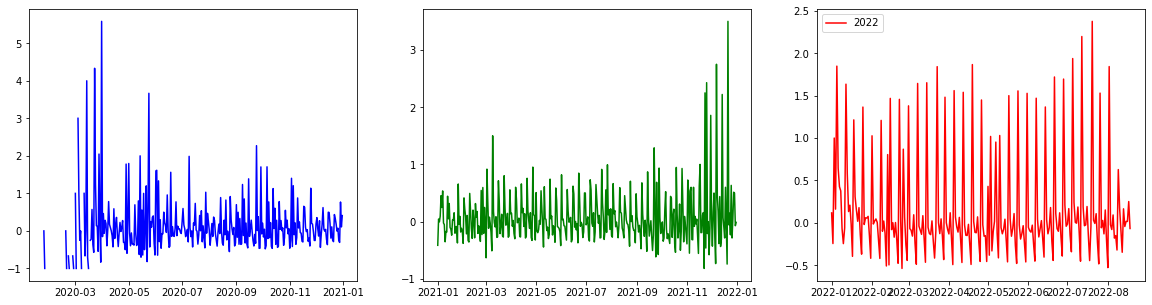

In [13]:
#時系列を重ねて表示
plt.figure(figsize=(20,5))

c1,c2,c3 = "blue","green","red"  
l1,l2,l3 = "2020","2021","2022" 

#y = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1, 1.5, 2.0, 2.5, 3.0 ]

plt.subplot(131)
plt.plot(newly_2020["Date"], newly_2020["変化量"], color=c1, label=l1)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(132)
plt.plot(newly_2021["Date"], newly_2021["変化量"], color=c2, label=l2)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(133)
plt.plot(newly_2022["Date"], newly_2022["変化量"], color=c3, label=l3)
#plt.yticks(y) #y軸のメモリを変更

plt.legend(loc=2)

plt.show()

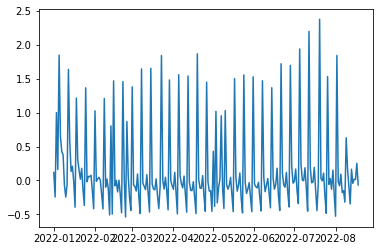

In [14]:
plt.plot(newly_2022["Date"], newly_2022["変化量"])

In [15]:
newly_2022

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa,変化量,year,month,day
716,2022-01-01,466,24,0,1,1,0,0,2,2,...,1,0,0,0,0,46,0.116883,2022,1,1
717,2022-01-02,432,6,0,0,1,0,0,6,2,...,1,0,0,0,1,53,-0.244186,2022,1,2
718,2022-01-03,788,15,2,3,3,0,1,1,5,...,1,1,1,1,4,128,1.000000,2022,1,3
719,2022-01-04,1094,30,2,1,5,0,1,3,9,...,8,0,1,0,1,216,0.161538,2022,1,4
720,2022-01-05,2788,60,7,3,2,0,13,12,14,...,16,3,2,3,19,629,1.847682,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022-08-14,178329,6006,1509,1107,2418,817,1073,1965,3178,...,2981,2966,1970,3011,3486,3679,-0.043453,2022,8,14
942,2022-08-15,138577,5290,815,789,1514,732,999,1257,2557,...,1941,1814,1543,1530,2626,2082,0.017370,2022,8,15
943,2022-08-16,166174,5540,1232,969,2947,1181,1087,1571,1737,...,1980,2769,1914,2085,3495,4315,0.016252,2022,8,16
944,2022-08-17,231472,6880,1947,1266,3624,1673,1643,1977,2620,...,3342,5157,3027,3213,4624,4837,0.251159,2022,8,17


##testのデータを成形

In [16]:
test.head()

,全国地方公共団体コード,都道府県名,市区町村名,判明_年月日,PCR検査陽性者数,抗原検査陽性者数,PCR検査陰性者数,抗原検査陰性者数,検査人数(7日間移動平均),陽性率
0,130001,東京都,NaN,2020-02-15,8,NaN,122,NaN,0.0,NaN
1,130001,東京都,NaN,2020-02-16,5,NaN,69,NaN,0.0,NaN
2,130001,東京都,NaN,2020-02-17,3,NaN,4,NaN,0.0,NaN
3,130001,東京都,NaN,2020-02-18,0,NaN,24,NaN,0.0,NaN
4,130001,東京都,NaN,2020-02-19,3,NaN,77,NaN,0.0,NaN


In [17]:
#見にくいので年で区切る　
test = test.rename(columns={"判明_年月日":"Date"})

print(test["Date"].dtypes)
test["Date"] = pd.to_datetime(test["Date"])
print(test["Date"].dtype) #データ型の確認

object
datetime64[ns]


In [18]:
#年、月、日、月日のカラムを作成
test["year"] = test["Date"].dt.year
test["month"] = test["Date"].dt.month
test["day"] = test["Date"].dt.day

test_2022 = test[test["year"] == 2022] #2022年のみ抽出
test_2021 = test[test["year"] == 2021] #2021年のみ抽出
test_2020 = test[test["year"] == 2020] #2020年のみ抽出

test_2022

,全国地方公共団体コード,都道府県名,市区町村名,Date,PCR検査陽性者数,抗原検査陽性者数,PCR検査陰性者数,抗原検査陰性者数,検査人数(7日間移動平均),陽性率,year,month,day
686,130001,東京都,NaN,2022-01-01,51,16.0,2489,995.0,5433.6,0.012,2022,1,1
687,130001,東京都,NaN,2022-01-02,57,46.0,2662,1116.0,5574.6,0.013,2022,1,2
688,130001,東京都,NaN,2022-01-03,92,57.0,2902,1408.0,5121.3,0.017,2022,1,3
689,130001,東京都,NaN,2022-01-04,248,156.0,7513,3096.0,5427.7,0.024,2022,1,4
690,130001,東京都,NaN,2022-01-05,464,175.0,8739,2876.0,6318.3,0.034,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,130001,東京都,NaN,2022-08-14,2066,2452.0,2467,1780.0,23394.1,0.481,2022,8,14
912,130001,東京都,NaN,2022-08-15,5119,6428.0,8793,5922.0,22226.6,0.473,2022,8,15
913,130001,東京都,NaN,2022-08-16,5826,5822.0,8884,5123.0,21110.9,0.467,2022,8,16
914,130001,東京都,NaN,2022-08-17,5588,4588.0,7452,4402.0,20125.1,0.465,2022,8,17


###東京の主要地区・歓楽街の人出

In [19]:
humanflow.head()

,日付,都道府県,主要地点の人出（8時）,主要地点の人出（15時）,歓楽街の人出（21時と28時の差）
0,2019-01-07,全国,0.600210,0.815705,0.520566
1,2019-01-07,北海道,0.566353,0.750083,0.503733
2,2019-01-07,青森県,0.792873,0.830438,0.264516
3,2019-01-07,岩手県,0.752182,0.957352,0.509240
4,2019-01-07,宮城県,0.686197,0.808265,0.452547


In [20]:
#見にくいので年で区切る
humanflow = humanflow.rename(columns={"日付":"Date"}) #カラム名を変更

print(humanflow["Date"].dtypes)
humanflow["Date"] = pd.to_datetime(humanflow["Date"])
print(humanflow["Date"].dtype) #データ型の確認

object
datetime64[ns]


In [21]:
#年、月、日、月日のカラムを作成
humanflow["year"] = humanflow["Date"].dt.year
humanflow["month"] = humanflow["Date"].dt.month
humanflow["day"] = humanflow["Date"].dt.day

humanflow_2022 = humanflow[(humanflow["year"] == 2022) & (humanflow["都道府県"] == "東京都")] #2022年のみ抽出
humanflow_2021 = humanflow[(humanflow["year"] == 2021) & (humanflow["都道府県"] == "東京都")] #2021年のみ抽出
humanflow_2020 = humanflow[(humanflow["year"] == 2020) & (humanflow["都道府県"] == "東京都")] #2020年のみ抽出

humanflow_2022

,Date,都道府県,主要地点の人出（8時）,主要地点の人出（15時）,歓楽街の人出（21時と28時の差）,year,month,day
52333,2022-01-01,東京都,0.468449,0.597463,0.438909,2022,1,1
52381,2022-01-02,東京都,0.449169,0.566478,0.401877,2022,1,2
52429,2022-01-03,東京都,0.372614,0.535115,0.344653,2022,1,3
52477,2022-01-04,東京都,0.354675,0.521987,0.293559,2022,1,4
52525,2022-01-05,東京都,0.387967,0.521680,0.268493,2022,1,5
...,...,...,...,...,...,...,...,...
63133,2022-08-14,東京都,0.541209,0.597173,0.413814,2022,8,14
63181,2022-08-15,東京都,0.511240,0.587821,0.404237,2022,8,15
63229,2022-08-16,東京都,0.492050,0.581535,0.393931,2022,8,16
63277,2022-08-17,東京都,0.487252,0.577248,0.380551,2022,8,17


分析に使用するデータを作成

In [22]:
#分析用データセット作成
df_2022 = newly_2022[["Date","Tokyo","変化量"]]
df_2022 = pd.merge(df_2022,test_2022[["Date","陽性率"]],on="Date")
df_2021 = newly_2021[["Date","Tokyo","変化量"]]
df_2021 = pd.merge(df_2021,test_2021[["Date","陽性率"]],on="Date")
df_2020 = newly_2020[["Date","Tokyo","変化量"]]
df_2020 = pd.merge(df_2020,test_2020[["Date","陽性率"]],on="Date")
df_2022

,Date,Tokyo,変化量,陽性率
0,2022-01-01,86,0.116883,0.012
1,2022-01-02,65,-0.244186,0.013
2,2022-01-03,130,1.000000,0.017
3,2022-01-04,151,0.161538,0.024
4,2022-01-05,430,1.847682,0.034
...,...,...,...,...
225,2022-08-14,22740,-0.043453,0.481
226,2022-08-15,23135,0.017370,0.473
227,2022-08-16,23511,0.016252,0.467
228,2022-08-17,29416,0.251159,0.465


In [23]:
df_1 = pd.merge(df_2022,humanflow_2022,on="Date")
df_2 = pd.merge(df_2021,humanflow_2021,on="Date")
df_3 = pd.merge(df_2020,humanflow_2020,on="Date")
df = pd.concat([df_2,df_1])
df_a = pd.concat([df,df_3])

In [24]:
print(test_2022.shape)
print(df_2022.shape)
df

(230, 13)
(230, 4)


,Date,Tokyo,変化量,陽性率,都道府県,主要地点の人出（8時）,主要地点の人出（15時）,歓楽街の人出（21時と28時の差）,year,month,day
0,2021-01-01,793,-0.413895,0.114,東京都,0.313069,0.448231,0.322344,2021,1,1
1,2021-01-02,829,0.045397,0.120,東京都,0.292435,0.422390,0.286032,2021,1,2
2,2021-01-03,826,-0.003619,0.126,東京都,0.280859,0.405786,0.262539,2021,1,3
3,2021-01-04,905,0.095642,0.135,東京都,0.274221,0.397260,0.231241,2021,1,4
4,2021-01-05,1315,0.453039,0.139,東京都,0.309876,0.404589,0.216139,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...
225,2022-08-14,22740,-0.043453,0.481,東京都,0.541209,0.597173,0.413814,2022,8,14
226,2022-08-15,23135,0.017370,0.473,東京都,0.511240,0.587821,0.404237,2022,8,15
227,2022-08-16,23511,0.016252,0.467,東京都,0.492050,0.581535,0.393931,2022,8,16
228,2022-08-17,29416,0.251159,0.465,東京都,0.487252,0.577248,0.380551,2022,8,17


第１波ピーク 2020年04月11日

第2波ピーク　　2020年08月07日

第３波ピーク　　2021年01月08日

第4派ピーク　　2021年03月下旬

第5波ピーク　　2021年08月20日

第6波ピーク　　2022年02月03日

第7波ピーク　　2022年8月現在

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)


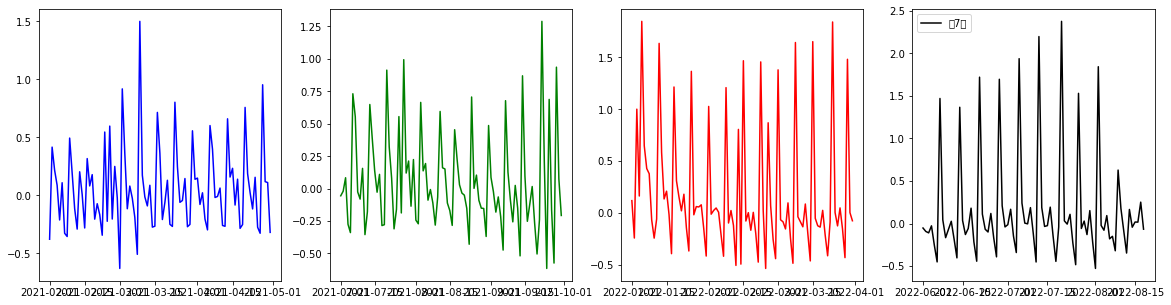

In [36]:
#時系列を重ねて表示
plt.figure(figsize=(20,5))

c1,c2,c3,c4 = "blue","green","red","black"  
l1,l2,l3,l4 = "第4派","第5波","第6波","第7波" 

#y = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1, 1.5, 2.0, 2.5, 3.0 ]
df_4 = df[(df["year"] == 2021) & ((df["month"] >= 2) & (df["month"] <= 4))]
df_5 = df[(df["year"] == 2021) & ((df["month"] >= 7) & (df["month"] <= 9))]
df_6 = df[(df["year"] == 2022) & ((df["month"] >= 1) & (df["month"] <= 3))]
df_7 = df[(df["year"] == 2022) & ((df["month"] >= 6) & (df["month"] <= 8))]

plt.subplot(141)
plt.plot(df_4["Date"], df_4["変化量"], color=c1, label=l1)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(142)
plt.plot(df_5["Date"], df_5["変化量"], color=c2, label=l2)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(143)
plt.plot(df_6["Date"], df_6["変化量"], color=c3, label=l3)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(144)
plt.plot(df_7["Date"], df_7["変化量"], color=c4, label=l4)
#plt.yticks(y) #y軸のメモリを変更

plt.legend(loc=2)

plt.show()

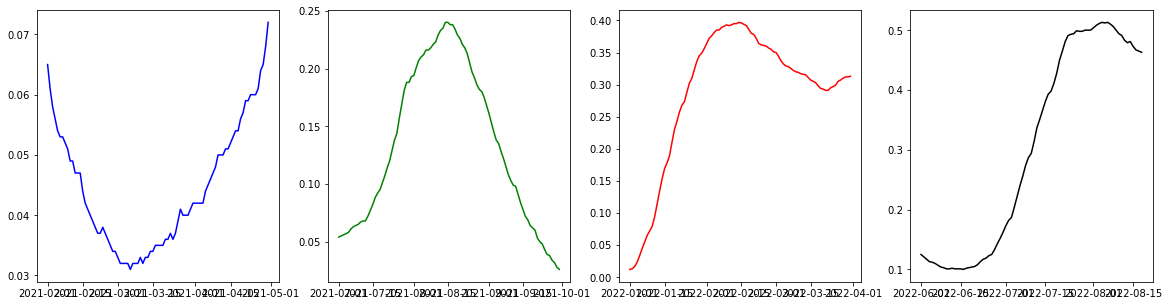

In [37]:
#時系列を重ねて表示
plt.figure(figsize=(20,5))

c1,c2,c3,c4 = "blue","green","red","black"  
l1,l2,l3,l4 = "第4派","第5波","第6波","第7波" 

#y = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1, 1.5, 2.0, 2.5, 3.0 ]
df_4 = df[(df["year"] == 2021) & ((df["month"] >= 2) & (df["month"] <= 4))]
df_5 = df[(df["year"] == 2021) & ((df["month"] >= 7) & (df["month"] <= 9))]
df_6 = df[(df["year"] == 2022) & ((df["month"] >= 1) & (df["month"] <= 3))]
df_7 = df[(df["year"] == 2022) & ((df["month"] >= 6) & (df["month"] <= 8))]

plt.subplot(141)
plt.plot(df_4["Date"], df_4["陽性率"], color=c1, label=l1)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(142)
plt.plot(df_5["Date"], df_5["陽性率"], color=c2, label=l2)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(143)
plt.plot(df_6["Date"], df_6["陽性率"], color=c3, label=l3)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(144)
plt.plot(df_7["Date"], df_7["陽性率"], color=c4, label=l4)
#plt.yticks(y) #y軸のメモリを変更

plt.show()

第４波を除き、第５波から第7波ではピーク前に陽性率が上がってる。
第４波までのcovid19とは異なり、陽性率が上がっていきピークに到達している。
同様にピークアウトする際には陽性率が低下している。
そのため、陽性率は感染症の拡大に大きな影響を与えていると考えられる。

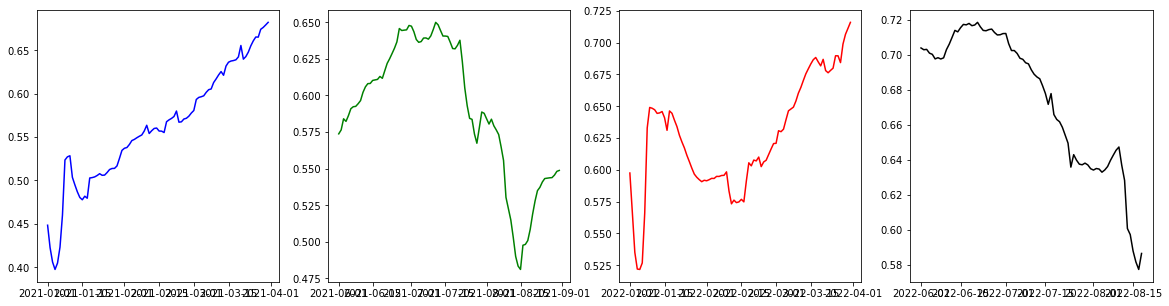

In [39]:
#時系列を重ねて表示
plt.figure(figsize=(20,5))

c1,c2,c3,c4 = "blue","green","red","black"  
l1,l2,l3,l4 = "第4派","第5波","第6波","第7波" 

#y = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1, 1.5, 2.0, 2.5, 3.0 ]
df_4 = df[(df["year"] == 2021) & ((df["month"] >= 1) & (df["month"] <= 3))]
df_5 = df[(df["year"] == 2021) & ((df["month"] >= 6) & (df["month"] <= 8))]
df_6 = df[(df["year"] == 2022) & ((df["month"] >= 1) & (df["month"] <= 3))]
df_7 = df[(df["year"] == 2022) & ((df["month"] >= 6) & (df["month"] <= 8))]

plt.subplot(141)
plt.plot(df_4["Date"], df_4["主要地点の人出（15時）"], color=c1, label=l1)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(142)
plt.plot(df_5["Date"], df_5["主要地点の人出（15時）"], color=c2, label=l2)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(143)
plt.plot(df_6["Date"], df_6["主要地点の人出（15時）"], color=c3, label=l3)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(144)
plt.plot(df_7["Date"], df_7["主要地点の人出（15時）"], color=c4, label=l4)
#plt.yticks(y) #y軸のメモリを変更

plt.show()

第４波から第7波は陽性率、新規陽性者数が上がっている時には人出も減少している。
感染拡大までは傾向として人出は増加傾向にある。
第5波と第６波では人出に差はないが陽性率、変化率は第５波より高く第５波までとは異なる傾向を示している。

In [28]:
#日付の計算をするモジュールをインポート
from dateutil.relativedelta import relativedelta

In [29]:
#diff()の()ないに数値を入れることで数値分ズラして差分を計算可能 変化率は.pct_change() ズラしはshift() 移動平均は.rolling(n).mean
df["Tokyo_差分"] = df["Tokyo"].diff()
df["Tokyo_移動平均7日間"] = df["Tokyo"].rolling(7,min_periods=1).mean()
df["陽性率_移動平均7日間"] = df["陽性率"].rolling(7,min_periods=1).mean()
df["主要地点の人出（15時）_移動平均7日間"] = df["主要地点の人出（15時）"].rolling(7,min_periods=1).mean()

In [30]:
df

,Date,Tokyo,変化量,陽性率,都道府県,主要地点の人出（8時）,主要地点の人出（15時）,歓楽街の人出（21時と28時の差）,year,month,day,Tokyo_差分,Tokyo_移動平均7日間,陽性率_移動平均7日間,主要地点の人出（15時）_移動平均7日間
0,2021-01-01,793,-0.413895,0.114,東京都,0.313069,0.448231,0.322344,2021,1,1,NaN,793.000000,0.114000,0.448231
1,2021-01-02,829,0.045397,0.120,東京都,0.292435,0.422390,0.286032,2021,1,2,36.0,811.000000,0.117000,0.435310
2,2021-01-03,826,-0.003619,0.126,東京都,0.280859,0.405786,0.262539,2021,1,3,-3.0,816.000000,0.120000,0.425469
3,2021-01-04,905,0.095642,0.135,東京都,0.274221,0.397260,0.231241,2021,1,4,79.0,838.250000,0.123750,0.418417
4,2021-01-05,1315,0.453039,0.139,東京都,0.309876,0.404589,0.216139,2021,1,5,410.0,933.600000,0.126800,0.415651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2022-08-14,22740,-0.043453,0.481,東京都,0.541209,0.597173,0.413814,2022,8,14,-1033.0,25629.000000,0.490571,0.628312
226,2022-08-15,23135,0.017370,0.473,東京都,0.511240,0.587821,0.404237,2022,8,15,395.0,26379.142857,0.485857,0.620485
227,2022-08-16,23511,0.016252,0.467,東京都,0.492050,0.581535,0.393931,2022,8,16,376.0,25578.571429,0.481143,0.611355
228,2022-08-17,29416,0.251159,0.465,東京都,0.487252,0.577248,0.380551,2022,8,17,5905.0,24889.000000,0.477000,0.601351


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)


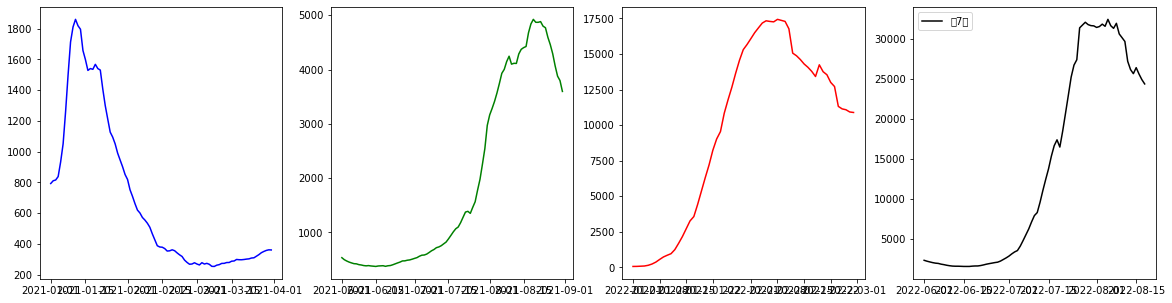

In [31]:
#時系列を重ねて表示
plt.figure(figsize=(20,5))

c1,c2,c3,c4 = "blue","green","red","black"  
l1,l2,l3,l4 = "第4派","第5波","第6波","第7波" 

#y = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1, 1.5, 2.0, 2.5, 3.0 ]
df_4 = df[(df["year"] == 2021) & ((df["month"] >= 1) & (df["month"] <= 3))]
df_5 = df[(df["year"] == 2021) & ((df["month"] >= 6) & (df["month"] <= 8))]
df_6 = df[(df["year"] == 2022) & ((df["month"] >= 1) & (df["month"] <= 2))]
df_7 = df[(df["year"] == 2022) & ((df["month"] >= 6) & (df["month"] <= 8))]

plt.subplot(141)
plt.plot(df_4["Date"], df_4["Tokyo_移動平均7日間"], color=c1, label=l1)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(142)
plt.plot(df_5["Date"], df_5["Tokyo_移動平均7日間"], color=c2, label=l2)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(143)
plt.plot(df_6["Date"], df_6["Tokyo_移動平均7日間"], color=c3, label=l3)
#plt.yticks(y) #y軸のメモリを変更

plt.subplot(144)
plt.plot(df_7["Date"], df_7["Tokyo_移動平均7日間"], color=c4, label=l4)
#plt.yticks(y) #y軸のメモリを変更

plt.legend(loc=2)

plt.show()

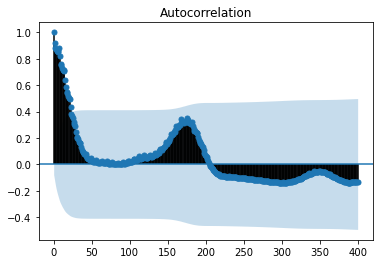

In [32]:
#自己相関
import statsmodels.api as sm

res = sm.graphics.tsa.plot_acf(df["Tokyo"],lags=400)

In [33]:
sm.tsa.stattools.acf(df["Tokyo"],nlags=180)[180]

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


0.30921710857540813

なんとなく分かっていたが、周期性は無いため相関があるという形では無さそう。

<ipython-input-34-b728b57bc1c0>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  x = sm.tsa.seasonal_decompose(df["Tokyo"].values, freq=180).plot()


TypeError: 'Figure' object is not subscriptable

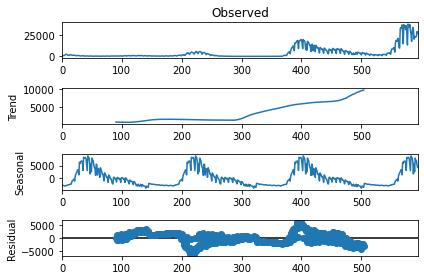

In [34]:
x = sm.tsa.seasonal_decompose(df["Tokyo"].values, freq=180).plot()
x[0]

まとめ

今回、covid19のオープンデータを元に感染拡大を予測できる因子を探索してみた。
結果、人出及び陽性率の増加が一定の効果を持っていそうであった。
一方、その他の要因により大きく感染者数が変化することもわかった。
また、covid19は周期性はなく、突如感染者数が増加するといったインフルエンザなどとは異なる性質があることが改めてデータより確認できた。
そのため、感染者数の増加はオープンデータから取ることが難しい別の要因に大きく起因することから予測は困難と考えられる。